Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


92/92 ━━━━━━━━━━━━━━━━━━━━ 84s 888ms/step - accuracy: 0.3676 - loss: 1.9517 - val_accuracy: 0.5926 - val_loss: 1.0030
Epoch 2/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 79s 859ms/step - accuracy: 0.5878 - loss: 1.0100 - val_accuracy: 0.7139 - val_loss: 0.7868
Epoch 3/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 81s 852ms/step - accuracy: 0.7241 - loss: 0.7440 - val_accuracy: 0.8052 - val_loss: 0.5773
Epoch 4/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 81s 838ms/step - accuracy: 0.8477 - loss: 0.4585 - val_accuracy: 0.8692 - val_loss: 0.3766
Epoch 5/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 99s 1s/step - accuracy: 0.9218 - loss: 0.2394 - val_accuracy: 0.8992 - val_loss: 0.3068
Please upload an image of a flower.


Saving marguerite-729510_1280.jpg to marguerite-729510_1280.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


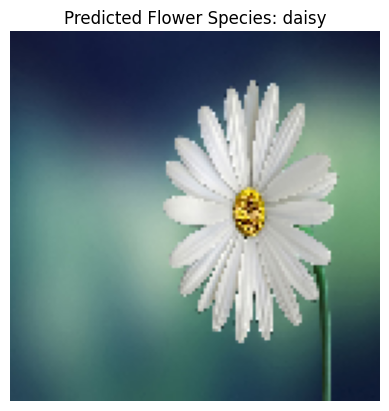

The model predicts this is a 'daisy'.


In [6]:
# Install necessary packages
!pip install tensorflow tensorflow-datasets matplotlib

import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image
from google.colab import files

# Load the 'tf_flowers' dataset
dataset, info = tfds.load('tf_flowers', with_info=True, as_supervised=True)

# Get the dataset and shuffle
full_dataset = dataset['train'].shuffle(1000)

# Split the dataset (80% train, 20% validation)
train_size = int(0.8 * info.splits['train'].num_examples)
train_dataset = full_dataset.take(train_size)
val_dataset = full_dataset.skip(train_size)

# Image size and batch size
IMG_SIZE = 128
BATCH_SIZE = 32

# Preprocessing function to resize and normalize
def preprocess_image(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = image / 255.0
    return image, label

# Preprocess datasets
train_dataset = train_dataset.map(preprocess_image).batch(BATCH_SIZE)
val_dataset = val_dataset.map(preprocess_image).batch(BATCH_SIZE)

# Build the CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(info.features['label'].num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_dataset, validation_data=val_dataset, epochs=5)

# Function to predict flower species from user-uploaded images
def predict_flower_species():
    # Prompt user to upload an image
    print("Please upload an image of a flower.")
    uploaded = files.upload()

    # Iterate through uploaded files
    for file_name in uploaded.keys():
        # Load and preprocess the image
        img = image.load_img(file_name, target_size=(IMG_SIZE, IMG_SIZE))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize and expand dims

        # Make prediction
        predictions = model.predict(img_array)
        predicted_class_index = np.argmax(predictions[0])
        flower_species = info.features['label'].int2str(predicted_class_index)

        # Display the image and prediction
        plt.imshow(img)
        plt.title(f"Predicted Flower Species: {flower_species}")
        plt.axis('off')
        plt.show()

        print(f"The model predicts this is a '{flower_species}'.")

# Run the prediction function
predict_flower_species()
